In [24]:
import pandas as pd
import numpy as np

data = np.array(pd.read_csv('data/train.csv'))
m, n = data.shape
print(data.shape)

(42000, 785)


In [25]:
x_train = np.array([r[1:n]/255. for r in data[0:int(m*0.9)]]).reshape((-1, 28, 28))
y_train = np.array([r[0] for r in data[0:int(m*0.9)]])

x_test = np.array([r[1:n]/255. for r in data[int(m*0.9):m]]).reshape((-1, 28, 28))
y_test = np.array([r[0] for r in data[int(m*0.9):m]])

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(37800, 28, 28) (37800,) (4200, 28, 28) (4200,)


In [26]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/bm/Dev/_myGithub/mnist-samples/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8568 - loss: 0.4938
Epoch 2/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9631 - loss: 0.1171
Epoch 3/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9766 - loss: 0.0768
Epoch 4/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9827 - loss: 0.0551
Epoch 5/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9865 - loss: 0.0378
Epoch 6/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0307
Epoch 7/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0249
Epoch 8/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9930 - loss: 0.0198
Epoch 9/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9930 - loss: 0.0201
Epoch 10/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9948 - loss: 0.0173
Epoch 11/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9963 - loss: 0.0109
Epoch 12/20
1182/1182 ━━━━━━━━

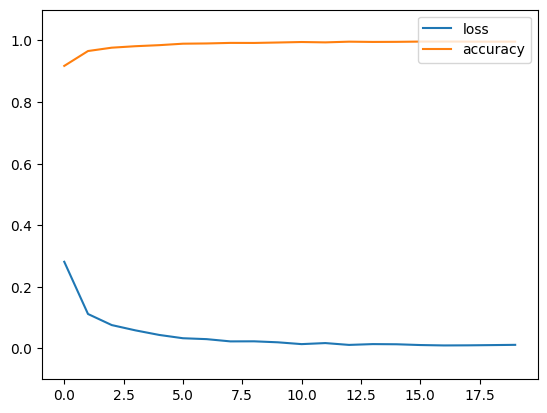

In [28]:
import matplotlib.pyplot as plt

plt.ylim(-0.1, 1.1)
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'], loc='upper right')

In [29]:
test_results = model.predict(x_test.reshape(-1,28,28)).argmax(axis=1)
(y_test == test_results).mean()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


0.9730952380952381

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[14]# Label: 3 | Pred: 1


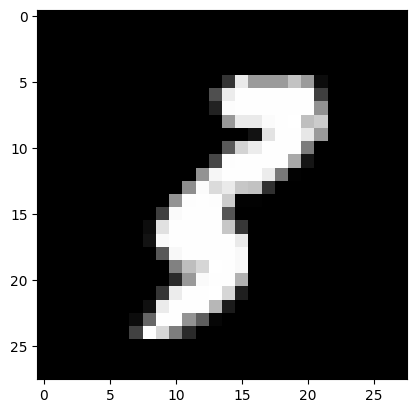

In [30]:
# Check first label and prediction difference

for idx in range(len(x_test)):
    pred = model.predict(x_test[idx].reshape(-1,28,28)).argmax(axis=1)[0]
    label = y_test[idx]

    if pred != label:
        print(f"[{idx}]# Label: {label} | Pred: {pred}")
        plt.gray()
        plt.imshow(x_test[idx], interpolation='nearest')
        plt.show()
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([4])

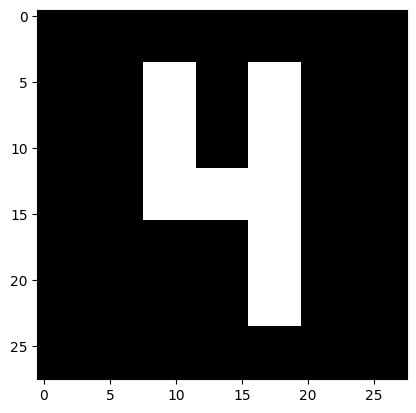

In [22]:
# Check prediction for manually inserted label

m = [[0,0,0,0,0,0,0],
     [0,0,1,0,1,0,0],
     [0,0,1,0,1,0,0],
     [0,0,1,1,1,0,0],
     [0,0,0,0,1,0,0],
     [0,0,0,0,1,0,0],
     [0,0,0,0,0,0,0]]
m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
plt.imshow(m.reshape(28,28))
model.predict(m.reshape(-1,28,28)).argmax(axis=1)